In [1]:
a = 3

In [ ]:
# ! pip install matplotlib
# ! pip install pandas
# ! pip install numpy
# ! pip install scikit-learn

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [16]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0,1,20)
y = x - 2 * (x**2) + 0.5 * (x**3) + np.random.normal(-3,3,20)

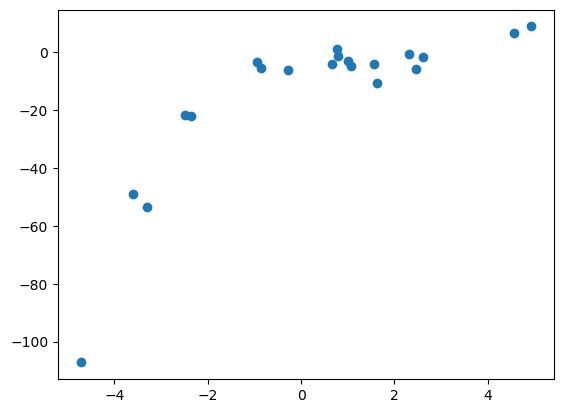

In [17]:
plt.scatter(x,y)

In [20]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LinearRegression()
model.fit(x,y)
y_pred  = model.predict(x)

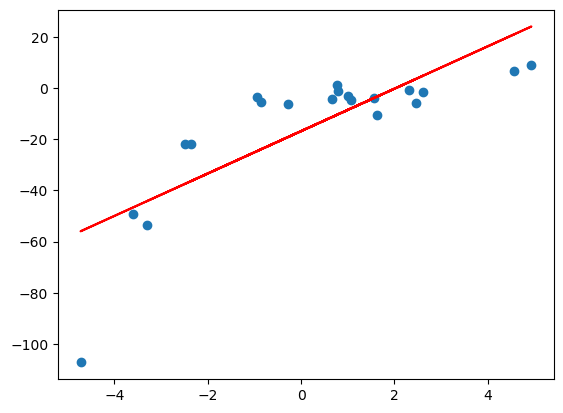

In [21]:
plt.scatter(x,y)
plt.plot(x,y_pred, color = 'r')
plt.show()

poly example

In [23]:
arr = np.array([1,2,3,4]).reshape(-1,1)
arr

array([[1],
       [2],
       [3],
       [4]])

In [28]:
# poly_features = PolynomialFeatures(degree= 3)
# new_arr = poly_features.fit_transform(arr)
# new_arr

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [29]:
# poly_features.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3'], dtype=object)

lets apply polynomial regression

In [46]:
poly_features = PolynomialFeatures(degree= 3)
x_poly = poly_features.fit_transform(x)

pr_model = LinearRegression()
pr_model.fit(x_poly,y)
pr_y_pred = pr_model.predict(x_poly)

In [44]:
sort_index = x.flatten().argsort()
x_sorted = x.flatten()[sort_index]
pr_y_pred_sorted = pr_y_pred[sort_index]

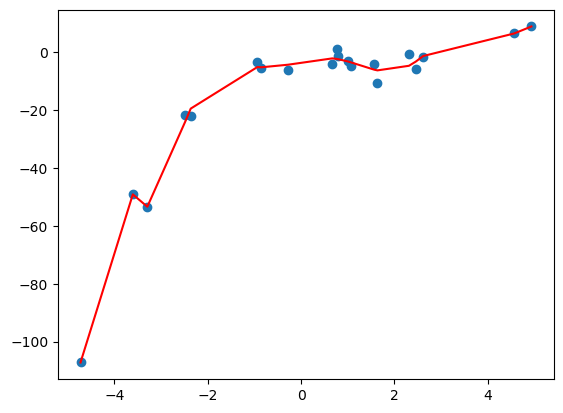

In [45]:
plt.scatter(x,y)
plt.plot(x_sorted,pr_y_pred_sorted, color = 'r')
plt.show()

# new data

In [56]:

n = 1000
x1 = np.random.randint(1,10,n)
x2 = np.linspace(0, .5, n)

noise = np.random.normal(0,0.5,n)
y = np.sin(x1) + np.cos(x2) + noise

df = pd.DataFrame({'x1':x1, 'x2':x2, 'y': y })
df

,x1,x2,y
0,2,0.000000,2.190325
1,7,0.000501,1.484397
2,6,0.001001,0.726287
3,9,0.001502,1.826300
4,5,0.002002,-0.208029
...,...,...,...
995,5,0.497998,0.093202
996,4,0.498498,0.100812
997,6,0.498999,0.014383
998,7,0.499499,2.529301


In [57]:
# lr model
model = LinearRegression()
model.fit(df[['x1','x2']], df['y'])

LinearRegression()

In [58]:
X = df[['x1','x2']]
df['y_pred'] = model.predict(X)

In [59]:
# ! pip install plotly

In [60]:
import plotly.graph_objects as go

In [62]:
fig = go.Figure(data=[go.Scatter3d(x= df['x1'], y = df['x2'], z = df['y'], mode = "markers", name = "Actual", marker= dict(size =3))])
fig.add_trace(go.Scatter3d(x= df['x1'], y = df['x2'], z = df['y_pred'], mode = "markers", name = "Actual", marker= dict(size =3)))

fig.show()


In [70]:
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(df[['x1','x2']])

p_model = LinearRegression()
p_model.fit(x_poly, df['y'])


LinearRegression()

In [71]:
df['p_y_pred'] = p_model.predict(x_poly)

fig = go.Figure(data=[go.Scatter3d(x= df['x1'], y = df['x2'], z = df['y'], mode = "markers", name = "Actual", marker= dict(size =3))])
fig.add_trace(go.Scatter3d(x= df['x1'], y = df['x2'], z = df['p_y_pred'], mode = "markers", name = "Actual", marker= dict(size =3)))

fig.show()
